Installing required packages with proper versions

In [ ]:
!pip install imbalanced_learn==0.8.1
!pip install numpy==1.18.5
!pip install matplotlib==3.4.2
!pip install pandas==1.3.0
!pip install imblearn==0.0
!pip install scikit_learn==1.0.1

Please make sure all packages are properly installed with specific versions, If not you may get errors while running the code

### Importing required libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('../input/data_regression.csv')

### Exploratory Data Analysis

In [4]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [8]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [23]:
per_null = ((df.isnull().sum()/df.isnull().count())*100)
sum_null = df.isnull().sum()

null = pd.DataFrame({'Percentage': per_null , 'Sum': sum_null})
null

,Percentage,Sum
year,0.00,0
customer_id,0.00,0
phone_no,0.00,0
gender,1.20,24
age,0.00,0
no_of_days_subscribed,0.00,0
multi_screen,0.00,0
mail_subscribed,0.00,0
weekly_mins_watched,0.00,0
minimum_daily_mins,0.00,0


In [30]:
df = df.dropna() # cleaning up null values

In [40]:
def unique_col(df, cols):
    for col in cols: 
        print(col, df[col].unique(), '\n')
unique_col(df, df.columns)

year [2015] 

customer_id [100198 100643 100756 ... 994954 998086 999961] 

phone_no ['409-8743' '340-5930' '372-3750' ... '329-3222' '383-9255' '414-1496'] 

gender ['Female' 'Male'] 

age [36 39 65 24 40 61 31 34 30 23 21 44 45 59 32 50 28 37 33 35 52 55 41 43
 38 26 29 27 56 49 47 42 67 46 64 48 57 66 22 51 25 62 53 19 76 54 60 75
 58 20 74 77 82 80 71 73 18 70 72 63 69 68] 

no_of_days_subscribed [ 62 149 126 131 191 205  63 114 107  84 142 137 100  99 115 194  76  94
  81 119 138 124 161  89 105  59  67 129  95  37  80 190 168 166  42  96
  77  54  41  53  98  90 146  51  97  74  86  75  27  65 163  44  92  45
 140 122  50 132 134 109  21 167  35 177 118  87 103 135 144 148  70  83
  30  56  93  72  91 110  55 128  38  64 172  82  39 108  66 162  10 156
 111 112 127  61 158 106 192 136 116  49  40 130 125   9  57  88  58 101
 179  17 117 152 159 155 123   5 186 139  19 147  34  73 121  78 153  85
  29 102 104 165  36 151 150  31 201 174 141 157 178  18 120  22 176 182
 189  79 154

#### **Class Imbalance**

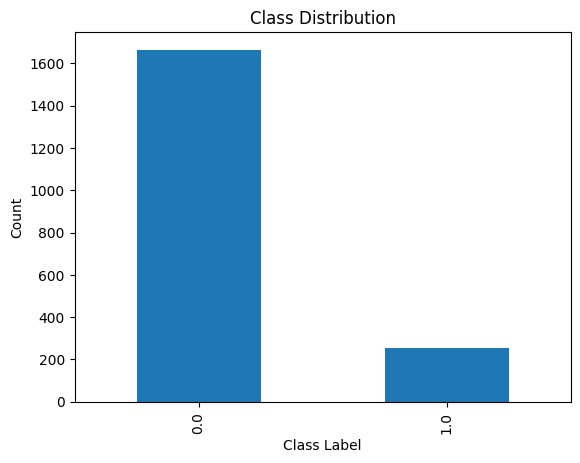

In [45]:
class_counts = df.churn.value_counts()
# Plotting the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [47]:
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input.   
def prepare_model_smote(df,class_col,cols_to_exclude):
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

### **Logistic Regression Model**

In [48]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [49]:
#for Logistics Regression
def run_model(X_train,X_test,y_train,y_test):
  global logreg #Defines the logistic model as a global model that can be used outside of this function

  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
    
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)

  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)

In [50]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76       513
         1.0       0.18      0.65      0.28        63

    accuracy                           0.64       576
   macro avg       0.56      0.65      0.52       576
weighted avg       0.85      0.64      0.71       576

The area under the curve is: 0.65


### **Decision Tree Model**

In [51]:
def run_model(X_train,X_test,y_train,y_test):
  global dectree #Defines the decision tree model as a global model that can be used outside of this function

  ##Fitting the decision tree model
  dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
  dectree.fit(X_train, y_train)
    
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = dectree.predict(X_test)

  dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%dectree_roc_auc)

All parameters of the decision tree classifier in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [52]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [53]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       513
         1.0       0.31      0.57      0.40        63

    accuracy                           0.81       576
   macro avg       0.62      0.71      0.64       576
weighted avg       0.87      0.81      0.84       576

The area under the curve is: 0.71


### **Model Evaluation**

**ROC Curve**

In [54]:
def plot_roc_curve (model,X_test,y_test):
    
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Model (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

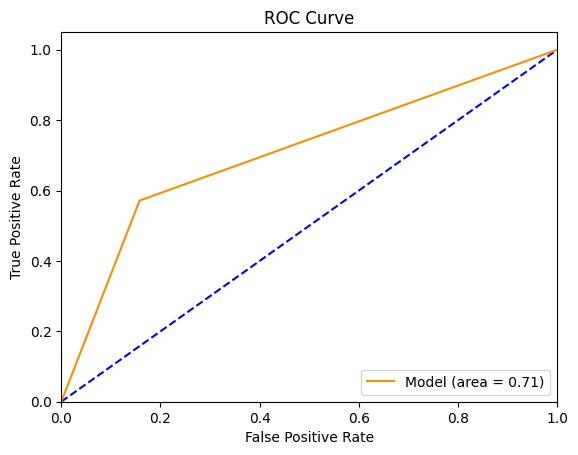

In [55]:
plot_roc_curve (dectree,X_test,y_test)

**Confusion Matrix**

In [14]:
def find_confusion_matrix(y_test,y_pred):
  confusion_mat = confusion_matrix(y_test, y_pred)
  print(confusion_mat)

  tn, fp, fn, tp = confusion_mat.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)


In [56]:
import seaborn as sns
def plot_confusion_matrix(y_test, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [15]:
find_confusion_matrix(y_test,y_pred)

[[432  81]
 [ 27  36]]
TN: 432.00
TP: 36.00
FP: 81.00
FN: 27.00


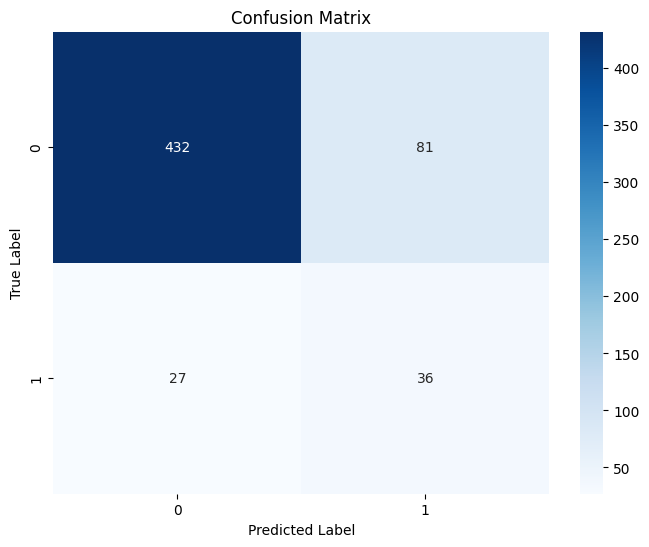

In [57]:
plot_confusion_matrix(y_test, y_pred)

### **Visualizing Decision tree model**

In [61]:
def plot_model(model,class_names,max_depth=None,figsize=(20,20),fontsize=1):
    plt.figure(figsize=figsize)
    tree.plot_tree(dectree
                   ,feature_names = dectree.feature_names_in_
                   ,fontsize=fontsize
                   ,max_depth = max_depth
                   ,class_names=class_names
                   ,filled = True);
    plt.show()

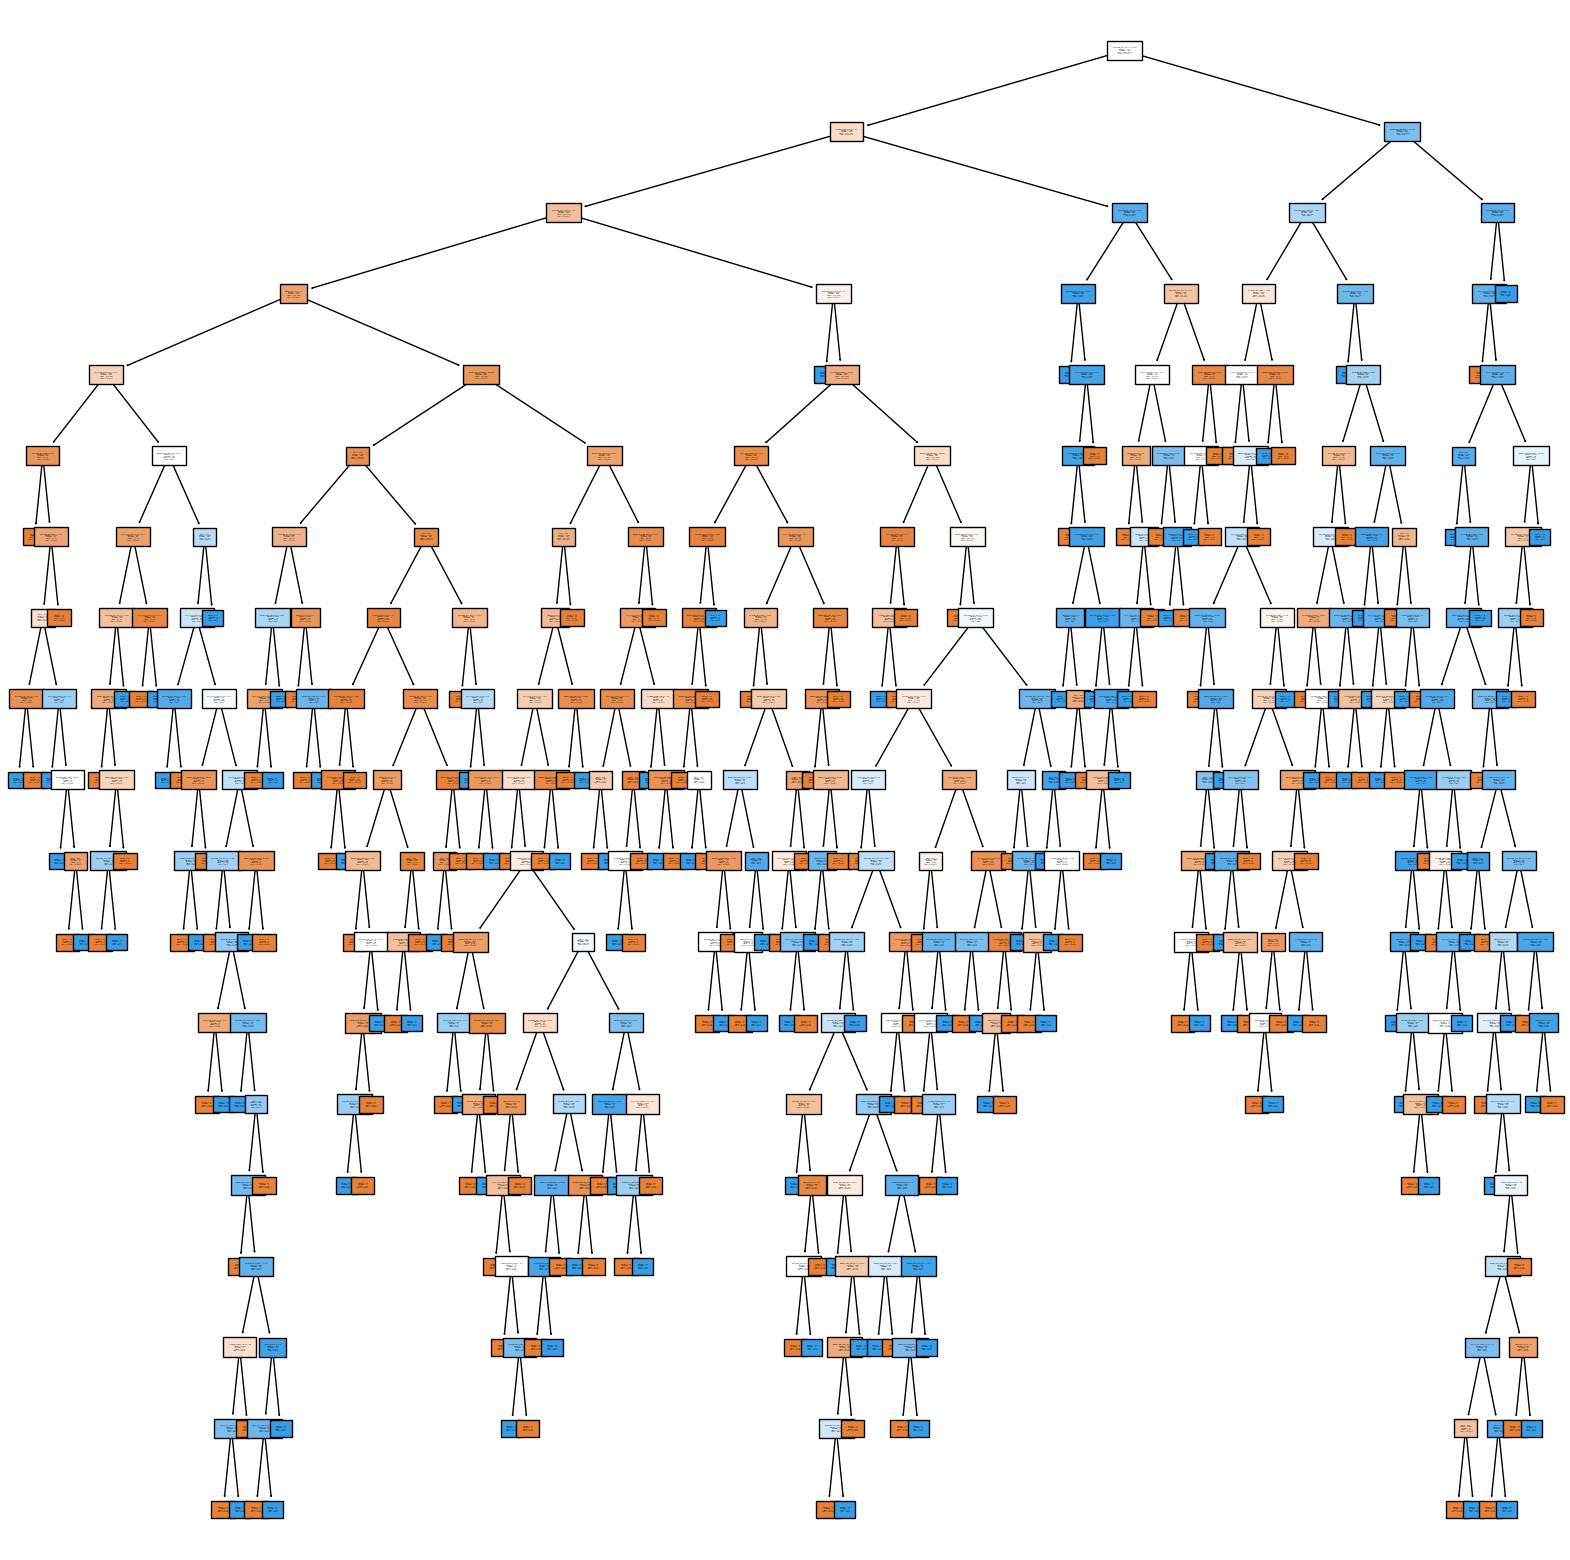

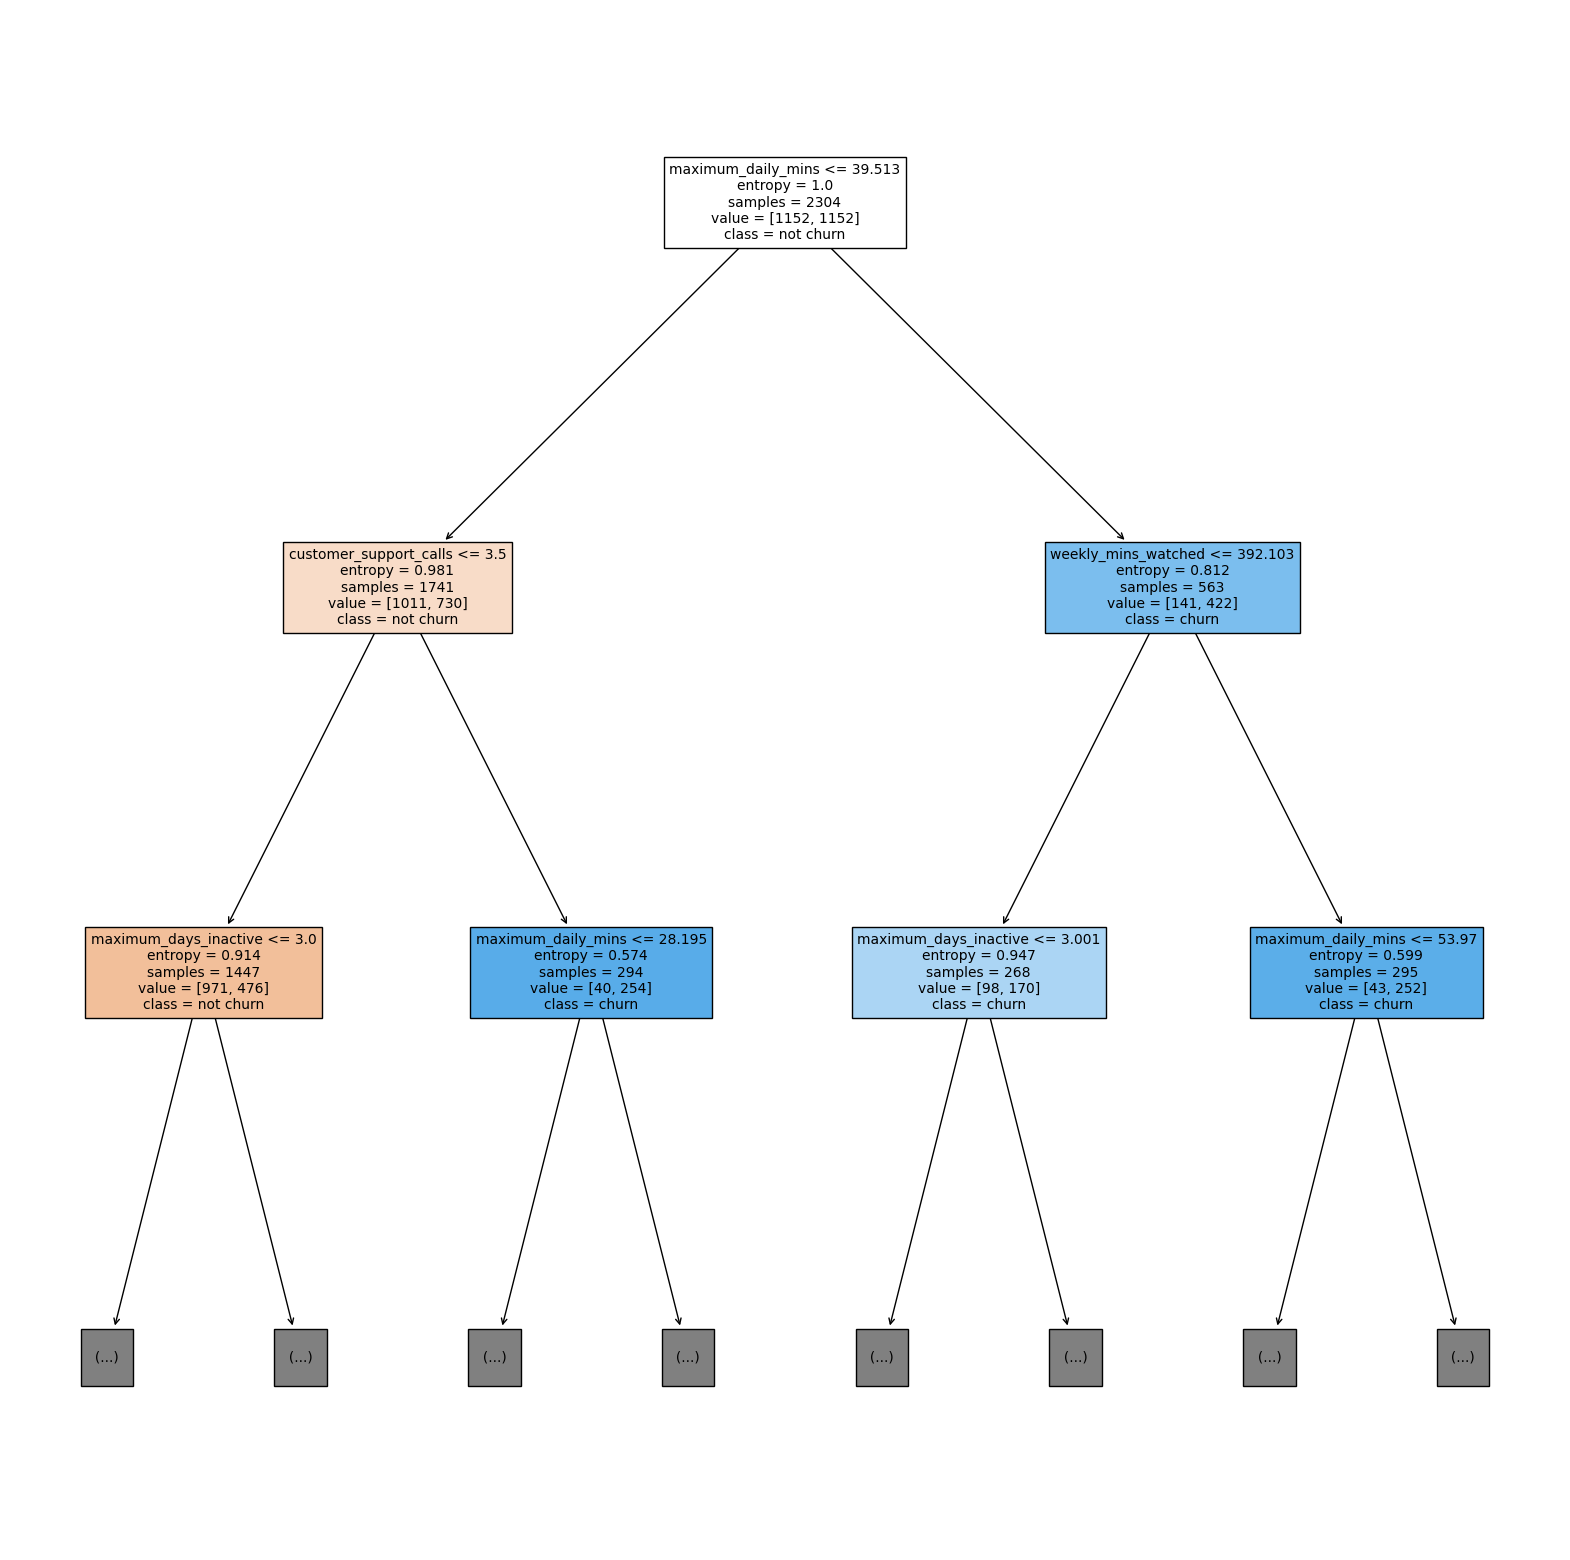

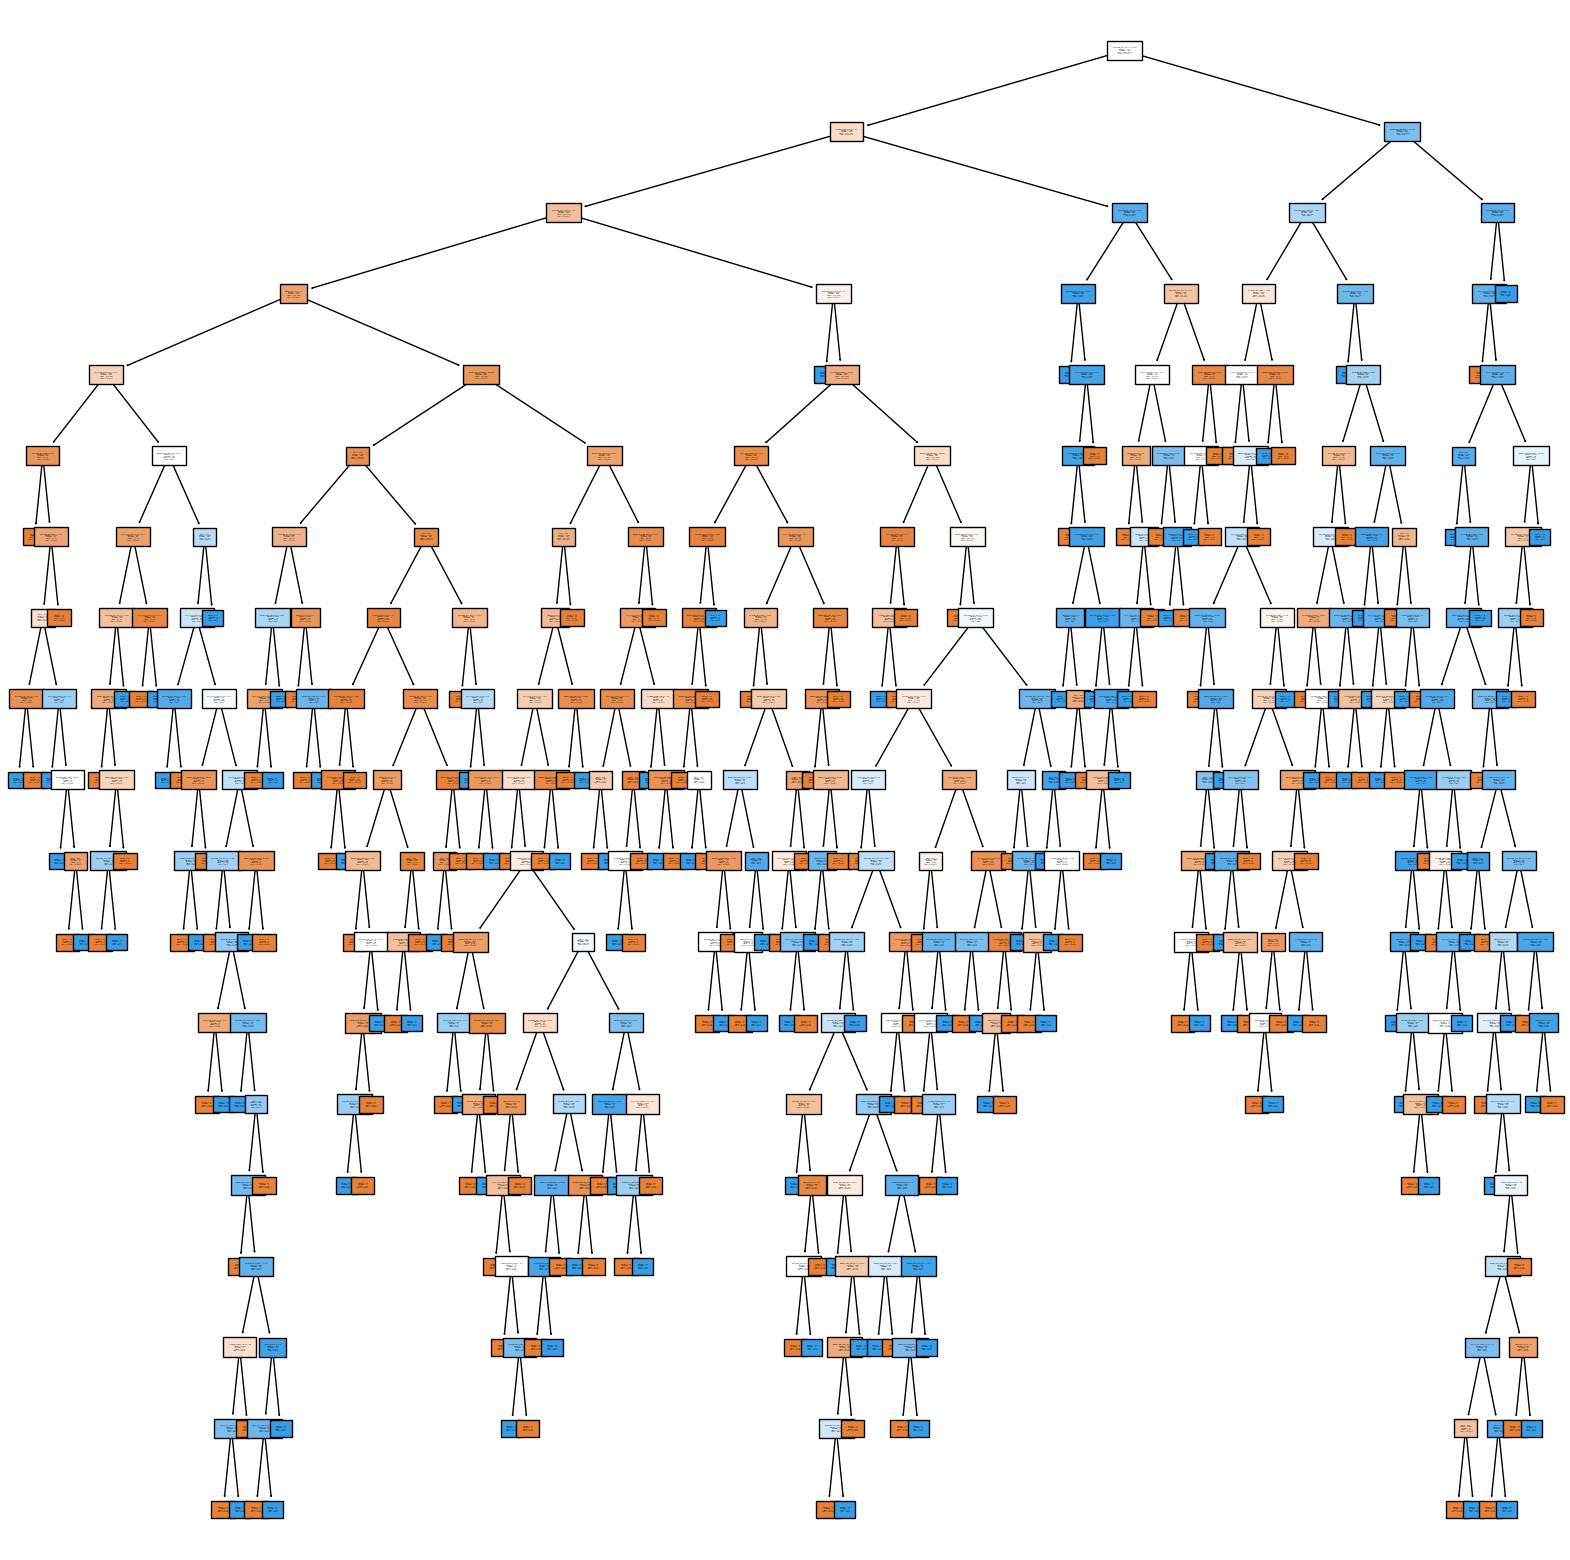

In [62]:
plot_model(dectree,['not churn','churn'])

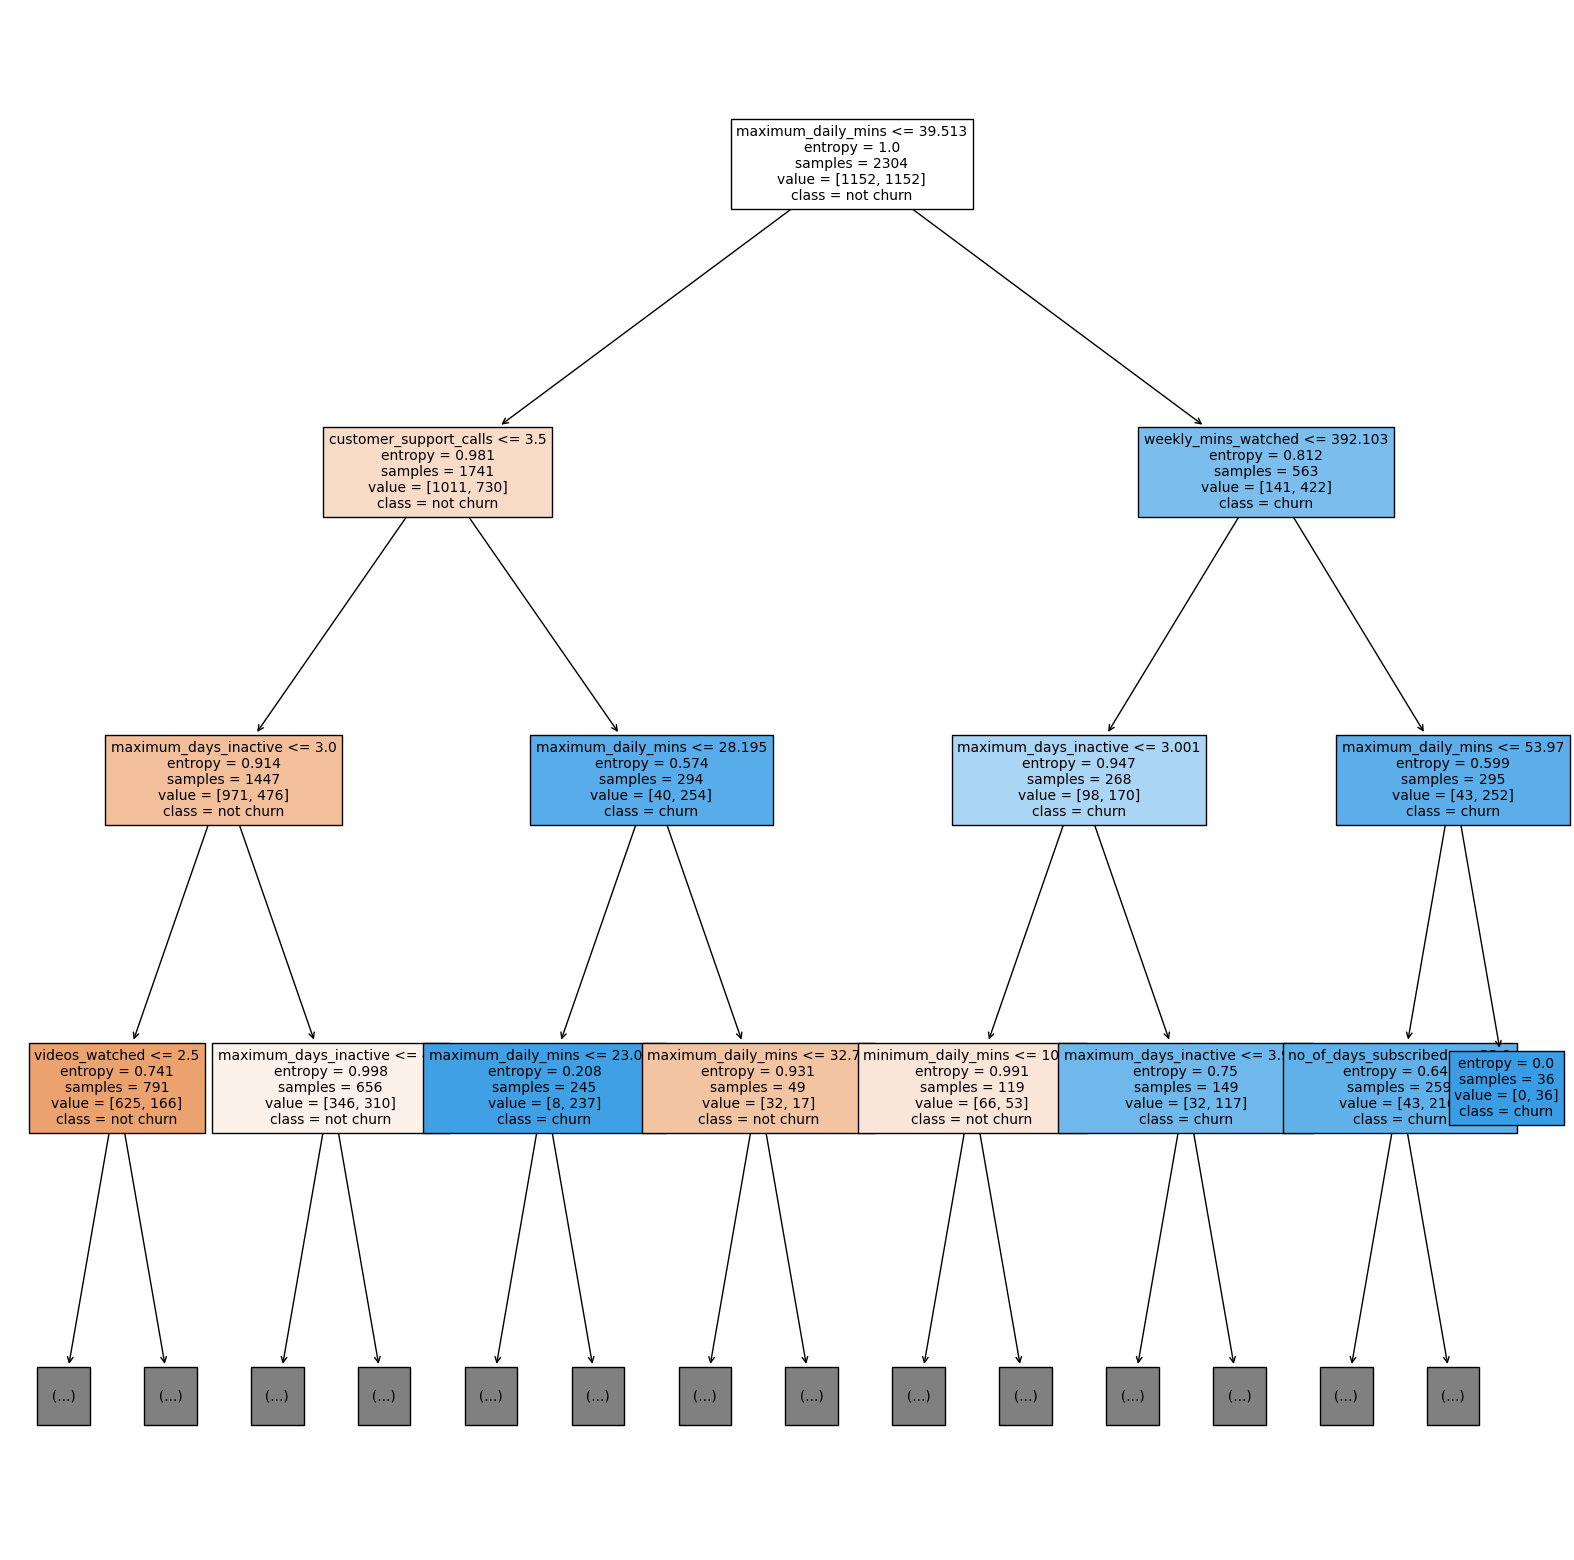

In [64]:
plot_model(dectree,['not churn','churn'],max_depth = 3,figsize=(20,20),fontsize=10)

In [65]:
def read_tree (model):
  n_nodes = model.tree_.node_count
  children_left = model.tree_.children_left
  children_right = model.tree_.children_right
  feature = model.tree_.feature
  feature_names = model.feature_names_in_
  threshold = model.tree_.threshold

  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    
  stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
  while len(stack) > 0:
      # `pop` ensures each node is only visited once
      node_id, depth = stack.pop()
      node_depth[node_id] = depth

      # If the left and right child of a node is not the same we have a split
      # node
      is_split_node = children_left[node_id] != children_right[node_id]
      # If a split node, append left and right children and depth to `stack`
      # so we can loop through them
      if is_split_node:
          stack.append((children_left[node_id], depth + 1))
          stack.append((children_right[node_id], depth + 1))
      else:
          is_leaves[node_id] = True

  print(
      "The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes)
  )
  for i in range(n_nodes):
      if is_leaves[i]:
          print(
              "{space}node={node} is a leaf node.".format(
                  space=node_depth[i] * "\t", node=i
              )
          )
      else:
          print(
              "{space}node={node} is a split node: "
              "go to node {left} if {feature} <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature_names[feature[i]],
                  threshold=round(threshold[i],0),
                  right=children_right[i],
              )
          )

Ref: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html with few adaptations
 

In [66]:
read_tree(dectree)

The binary tree structure has 493 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if maximum_daily_mins <= 40.0 else to node 352.
	node=1 is a split node: go to node 2 if customer_support_calls <= 4.0 else to node 313.
		node=2 is a split node: go to node 3 if maximum_days_inactive <= 3.0 else to node 190.
			node=3 is a split node: go to node 4 if videos_watched <= 2.0 else to node 73.
				node=4 is a split node: go to node 5 if no_of_days_subscribed <= 88.0 else to node 20.
					node=5 is a split node: go to node 6 if minimum_daily_mins <= 8.0 else to node 7.
						node=6 is a leaf node.
						node=7 is a split node: go to node 8 if minimum_daily_mins <= 10.0 else to node 19.
							node=8 is a split node: go to node 9 if age <= 36.0 else to node 12.
								node=9 is a split node: go to node 10 if maximum_daily_mins <= 19.0 else to node 11.
									node=10 is a leaf node.
									node=11 is a leaf node.
								node=12 is a split node: go to node 

### **Feature Importance**

In [75]:
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()
  plt.show()

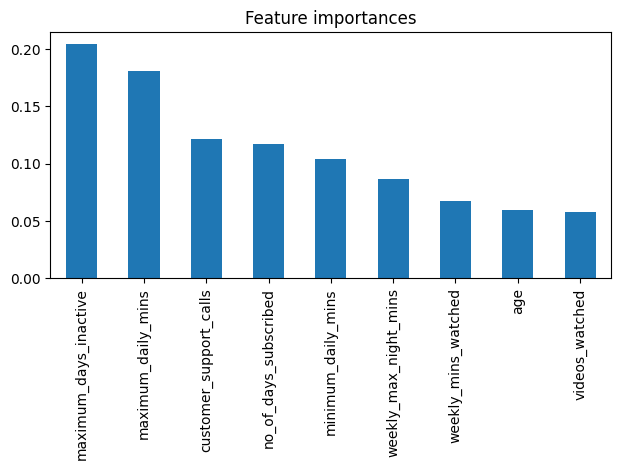

In [77]:
plot_feature_importances(dectree)